Test different settings for Denoising Autoencoder

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [41]:
import numpy as np
import pandas as pd
import time
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input, Dense
from keras.models import Model
import keras

from sklearn import preprocessing
import seaborn as sns



### Load pickle

In [3]:
pklfile = '/Users/bogao/DataFiles/new landscape/data/breast_cyto.pkl'
with open(pklfile, 'rb') as fi:
    feat_mat = pickle.load(fi)

In [113]:
feat_mat[2,100]

1.524

feat_mat.shape

In [122]:
def groupAmpDel(x):
    amps = x[::2].copy()

    dels =x[1::2].copy()

    return np.concatenate((amps, dels))

In [123]:
featmat_t = np.apply_along_axis(groupAmpDel, 1, feat_mat)

In [81]:
feat_m1 = feat_mat[::2].copy()

feat_m2 =feat_mat[1::2].copy()

featmat_t = np.concatenate((feat_m1, feat_m2))

In [114]:
featmat_t[1,100]

1.524

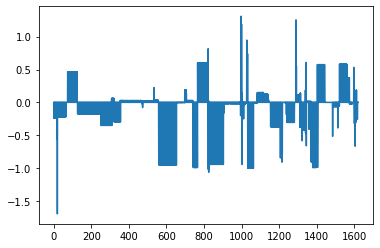

In [125]:
sns.lineplot(x=range(input_size),y=feat_mat[idx])

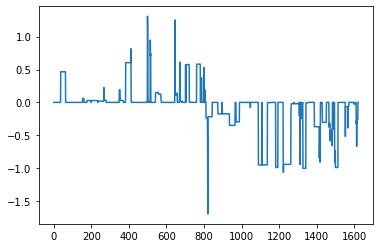

In [124]:
sns.lineplot(x=range(input_size),y=featmat_t[idx])

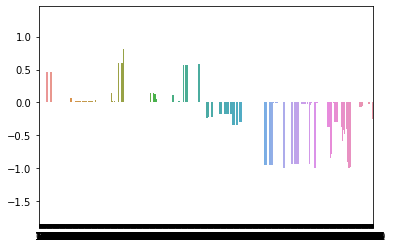

In [135]:
sns.(x=list(range(input_size)),y=featmat_t[idx])

In [133]:
feat_mat[idx].sum()

-128.35664090932386

### Scale data

In [116]:
feat_scaled = preprocessing.MinMaxScaler().fit_transform(np.abs(feat_mat))
feat_t_scaled = preprocessing.MinMaxScaler().fit_transform(np.abs(featmat_t))

### Global params

In [138]:
early_stopping_monitor = keras.callbacks.EarlyStopping(monitor='loss', patience=20,mode='min')
input_size = feat_scaled.shape[1]
hidden_size = 800
output_size = input_size
epochs = 2000
batch_size = 128

### Helper functions

In [17]:
def plotHis(his_list, labels, loss_y_top=0):
    plt.figure(figsize=(40,20))

    plt.subplot(1,2, 1)
    for his in his_list:
        plt.plot(his.history['loss'])
    plt.title('Models loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if loss_y_top > 0:
        plt.ylim(top=loss_y_top)
    plt.legend(labels, loc='upper right')

    plt.subplot(1,2, 2)
    for his in his_list:
        plt.plot(his.history['acc'])
    plt.title('Models accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(labels, loc='upper right')

    plt.show()

In [74]:
def plotSignals(models, data, labels):

    plt.figure(figsize=(40,20))

    plt_rows = 2
    plt_cols = np.ceil(len(models_nf)/2)

    plt.subplot(plt_rows,plt_cols, 1)
    sns.lineplot(x=range(input_size),y=feat_scaled[idx])
    plt.xlabel('scaled')
    
    i = 2
    for model in models:
        decoded = model.predict(data)
        plt.subplot(plt_rows,plt_cols, i)
        sns.lineplot(x=range(input_size),y=decoded[0])
        plt.xlabel(labels[i-2])
        i +=1

### Basic mode

In [7]:
noise_factor = 0.05
feat_noisy = feat_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=feat_scaled.shape) 
feat_noisy = np.clip(feat_noisy, 0., 1.)

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder_base = Model(inputs=x, outputs=r)
autoencoder_base.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

history_base = autoencoder_base.fit(feat_noisy, feat_noisy, batch_size=batch_size,epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True)

Epoch 1/2000
6250/6250 [==============================] - 3s 426us/step - loss: 0.0342 - acc: 0.0021
Epoch 2/2000
6250/6250 [==============================] - 2s 321us/step - loss: 0.0091 - acc: 0.0030
Epoch 3/2000
6250/6250 [==============================] - 2s 324us/step - loss: 0.0091 - acc: 0.0027
Epoch 4/2000
6250/6250 [==============================] - 2s 329us/step - loss: 0.0090 - acc: 0.0022
Epoch 5/2000
6250/6250 [==============================] - 2s 317us/step - loss: 0.0090 - acc: 0.0026
Epoch 6/2000
6250/6250 [==============================] - 2s 306us/step - loss: 0.0089 - acc: 0.0019
Epoch 7/2000
6250/6250 [==============================] - 2s 324us/step - loss: 0.0087 - acc: 0.0026
Epoch 8/2000
6250/6250 [==============================] - 2s 353us/step - loss: 0.0086 - acc: 0.0027
Epoch 9/2000
6250/6250 [==============================] - 2s 337us/step - loss: 0.0085 - acc: 0.0034
Epoch 10/2000
6250/6250 [==============================] - 2s 327us/step - loss: 0.0082 - a

6250/6250 [==============================] - 2s 293us/step - loss: 9.9260e-04 - acc: 0.6547
Epoch 161/2000
6250/6250 [==============================] - 2s 294us/step - loss: 9.6530e-04 - acc: 0.6573
Epoch 162/2000
6250/6250 [==============================] - 2s 294us/step - loss: 9.5483e-04 - acc: 0.6515
Epoch 163/2000
6250/6250 [==============================] - 2s 295us/step - loss: 9.4427e-04 - acc: 0.6603
Epoch 164/2000
6250/6250 [==============================] - 2s 290us/step - loss: 9.3667e-04 - acc: 0.6646
Epoch 165/2000
6250/6250 [==============================] - 2s 294us/step - loss: 9.3501e-04 - acc: 0.6643
Epoch 166/2000
6250/6250 [==============================] - 2s 292us/step - loss: 9.3188e-04 - acc: 0.6680
Epoch 167/2000
6250/6250 [==============================] - 2s 292us/step - loss: 9.3190e-04 - acc: 0.6677
Epoch 168/2000
6250/6250 [==============================] - 2s 293us/step - loss: 9.3450e-04 - acc: 0.6635
Epoch 169/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 289us/step - loss: 6.8711e-04 - acc: 0.7528
Epoch 313/2000
6250/6250 [==============================] - 2s 293us/step - loss: 6.9026e-04 - acc: 0.7573
Epoch 314/2000
6250/6250 [==============================] - 2s 292us/step - loss: 6.9261e-04 - acc: 0.7530
Epoch 315/2000
6250/6250 [==============================] - 2s 288us/step - loss: 6.8903e-04 - acc: 0.7523
Epoch 316/2000
6250/6250 [==============================] - 2s 290us/step - loss: 6.8778e-04 - acc: 0.7562
Epoch 317/2000
6250/6250 [==============================] - 2s 294us/step - loss: 6.8989e-04 - acc: 0.7547
Epoch 318/2000
6250/6250 [==============================] - 2s 289us/step - loss: 6.8973e-04 - acc: 0.7514
Epoch 319/2000
6250/6250 [==============================] - 2s 294us/step - loss: 6.8961e-04 - acc: 0.7579
Epoch 320/2000
6250/6250 [==============================] - 2s 288us/step - loss: 6.8927e-04 - acc: 0.7517
Epoch 321/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 290us/step - loss: 6.2290e-04 - acc: 0.7720
Epoch 465/2000
6250/6250 [==============================] - 2s 291us/step - loss: 6.1938e-04 - acc: 0.7734
Epoch 466/2000
6250/6250 [==============================] - 2s 302us/step - loss: 6.1908e-04 - acc: 0.7699
Epoch 467/2000
6250/6250 [==============================] - 2s 295us/step - loss: 6.1859e-04 - acc: 0.7690
Epoch 468/2000
6250/6250 [==============================] - 2s 291us/step - loss: 6.1662e-04 - acc: 0.7752
Epoch 469/2000
6250/6250 [==============================] - 2s 290us/step - loss: 6.1723e-04 - acc: 0.7701
Epoch 470/2000
6250/6250 [==============================] - 2s 289us/step - loss: 6.1462e-04 - acc: 0.7694
Epoch 471/2000
6250/6250 [==============================] - 2s 282us/step - loss: 6.1871e-04 - acc: 0.7680
Epoch 472/2000
6250/6250 [==============================] - 2s 278us/step - loss: 6.1908e-04 - acc: 0.7691
Epoch 473/2000
6250/6250 [==========================

6250/6250 [==============================] - 2s 332us/step - loss: 5.8562e-04 - acc: 0.7798
Epoch 617/2000
6250/6250 [==============================] - 2s 347us/step - loss: 5.8126e-04 - acc: 0.7877
Epoch 618/2000
6250/6250 [==============================] - 2s 330us/step - loss: 5.8523e-04 - acc: 0.7750
Epoch 619/2000
6250/6250 [==============================] - 2s 325us/step - loss: 5.8456e-04 - acc: 0.7786
Epoch 620/2000
6250/6250 [==============================] - 2s 327us/step - loss: 5.8302e-04 - acc: 0.7816
Epoch 621/2000
6250/6250 [==============================] - 2s 325us/step - loss: 5.8458e-04 - acc: 0.7778
Epoch 622/2000
6250/6250 [==============================] - 2s 324us/step - loss: 5.8138e-04 - acc: 0.7818
Epoch 623/2000
6250/6250 [==============================] - 2s 317us/step - loss: 5.8128e-04 - acc: 0.7840
Epoch 624/2000
6250/6250 [==============================] - 2s 321us/step - loss: 5.8066e-04 - acc: 0.7776
Epoch 625/2000
6250/6250 [==========================

In [136]:
autoencoder_base.save('/Users/bogao/DataFiles/new landscape/models/dae_basic')

### 1-layer, change noise_factor

In [8]:
# epochs = 10 # for testing

models_nf = [autoencoder_base]
histories_nf = [history_base]
noises = np.arange(0, 0.05, 0.005).round(3).tolist()
noises[0] = 0.001

for noise_factor in noises:
    feat_noisy = feat_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=feat_scaled.shape) 
    feat_noisy = np.clip(feat_noisy, 0., 1.)
    
    x = Input(shape=(input_size,))
    h = Dense(hidden_size, activation='relu')(x)
    r = Dense(output_size, activation='sigmoid')(h)

    autoencoder_dn = Model(inputs=x, outputs=r)
    autoencoder_dn.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

    history = autoencoder_dn.fit(feat_noisy, feat_noisy, batch_size=batch_size,epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True, verbose=0)
    models_nf.append(autoencoder_dn)
    histories_nf.append(history)

Save models to disk

In [45]:
file_path = '/Users/bogao/DataFiles/new landscape/models'
model_type = 'dae_noisefactor_'
for m, n in zip(models_nf[1:], noises):
    filename = ''.join([model_type, str(n)])
    filename = os.path.join(file_path, filename)
    m.save(filename)
    

In [47]:
filename = ''.join([model_type, 'histories'])
filename = os.path.join(file_path, filename)
with open(filename, 'wb') as fo:
    pickle.dump(feat_mat, fo)

Plots

In [77]:
labels = [str(i) for i in noises]
labels.insert(0, 'basic')

Plots of loss & acc

In [ ]:
plt.figure(figsize=(40,20))

plt.subplot(1,2, 1)
for his in histories_nf:
    plt.plot(his.history['loss'])
plt.title('Models loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(top=0.01)
plt.legend(noises, loc='upper right')

plt.subplot(1,2, 2)
for his in histories_nf:
    plt.plot(his.history['acc'])
plt.title('Models accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(noises, loc='upper right')

plt.show()

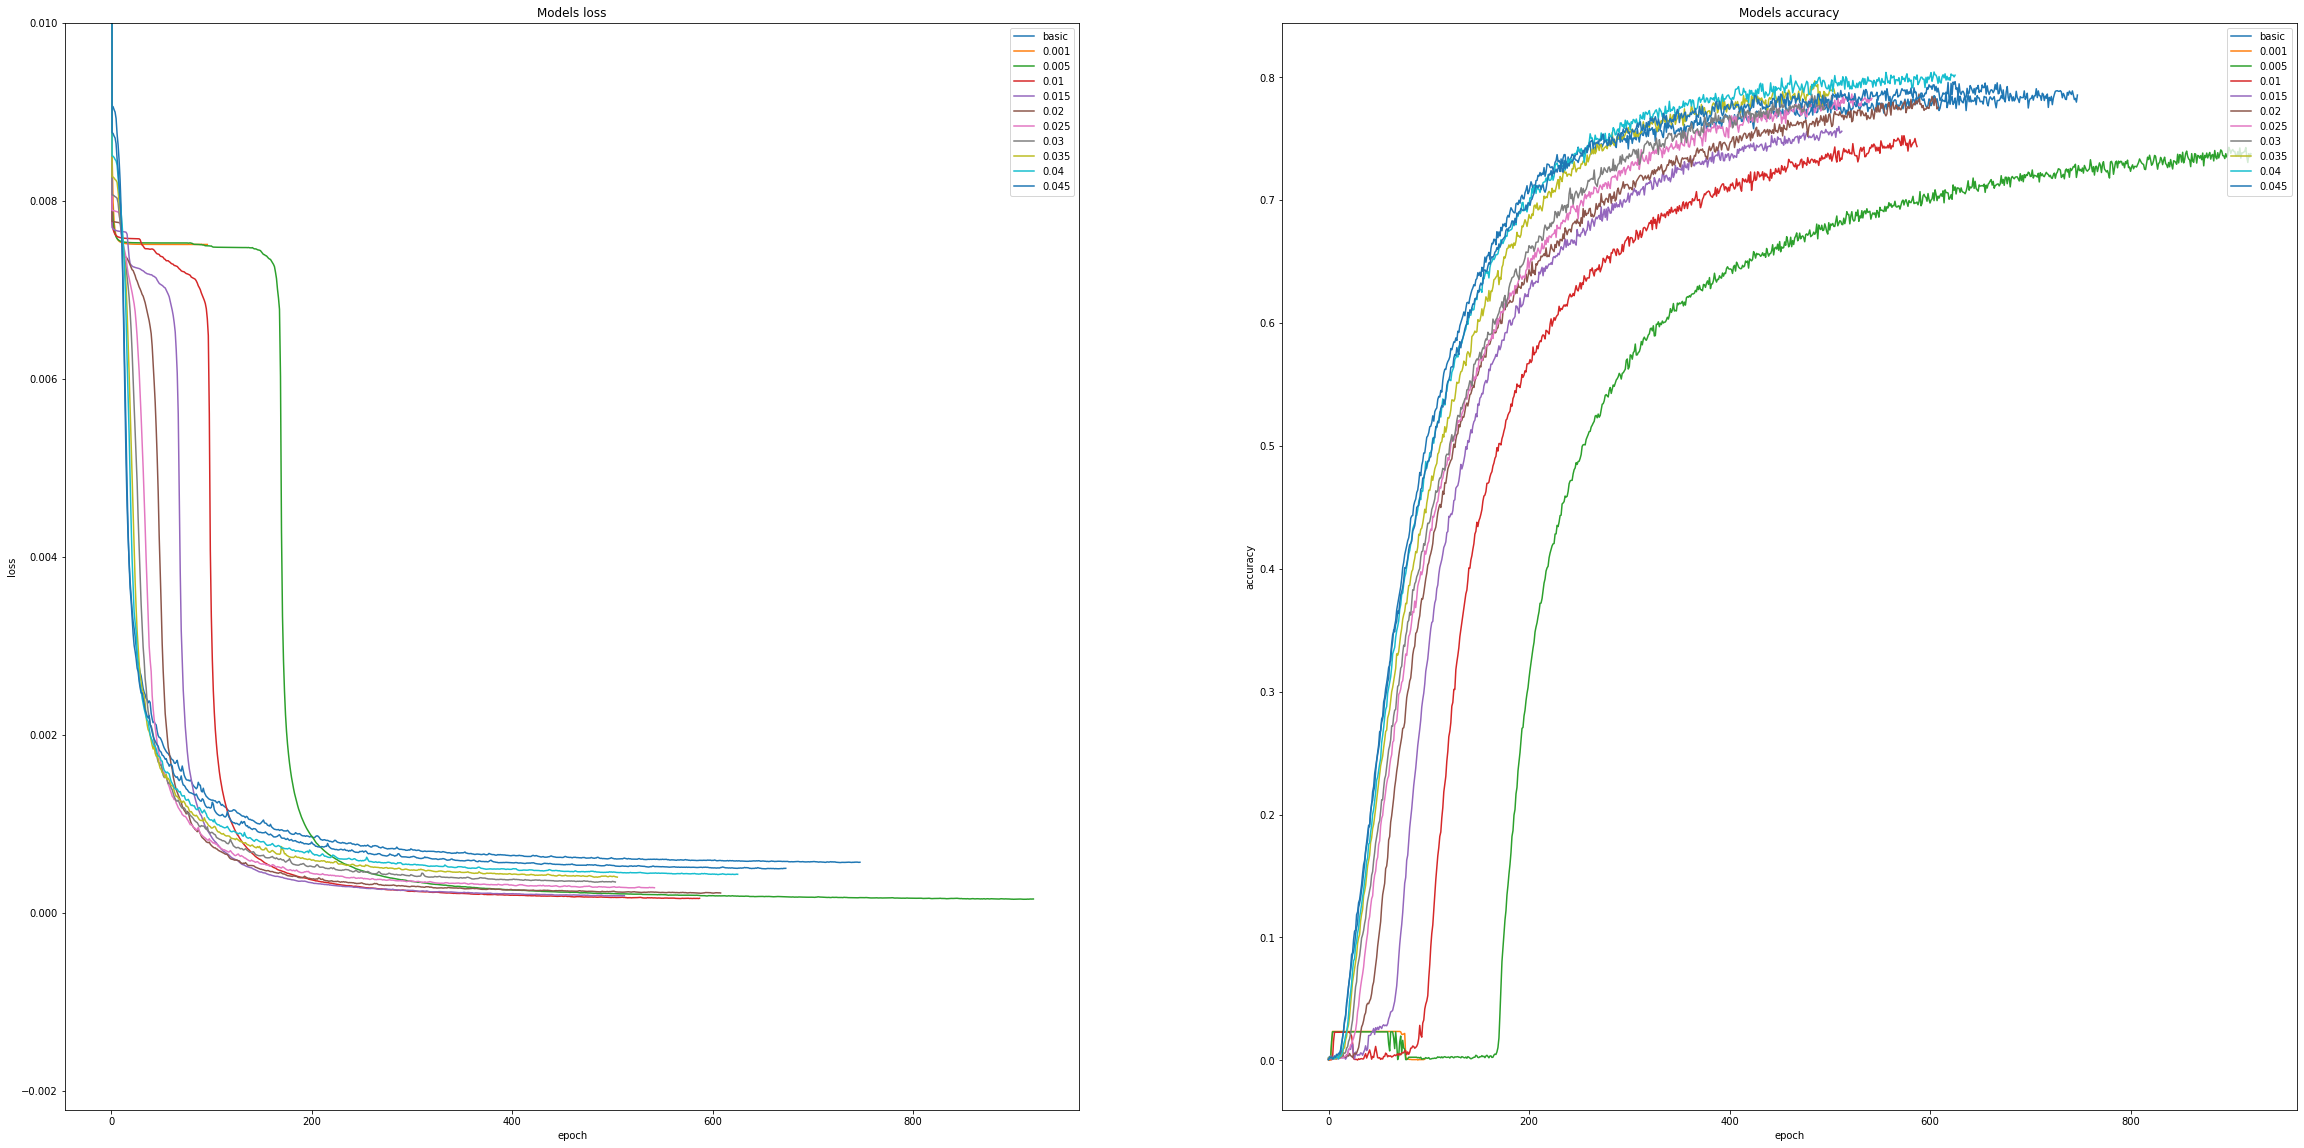

In [20]:
plotHis(histories_nf, labels, 0.01)

Plots of shapes

In [ ]:
idx = 1234
plt.figure(figsize=(20,10))

plt_rows = 2
plt_cols = len(models_nf)/2+1

# plt_rows = 1
# plt_cols = len(models_nf)+1

# plt.subplot(plt_rows,plt_cols, 1)
# sns.lineplot(x=range(input_size),y=feat_scaled[idx])
# plt.xlabel('scaled')

i = 1
for model in models_nf:
    decoded = model.predict(feat_scaled[idx].reshape(1,input_size,))
    plt.subplot(plt_rows,plt_cols, i)
    sns.lineplot(x=range(input_size),y=decoded[0])
    plt.xlabel(labels[i-1])
    i +=1

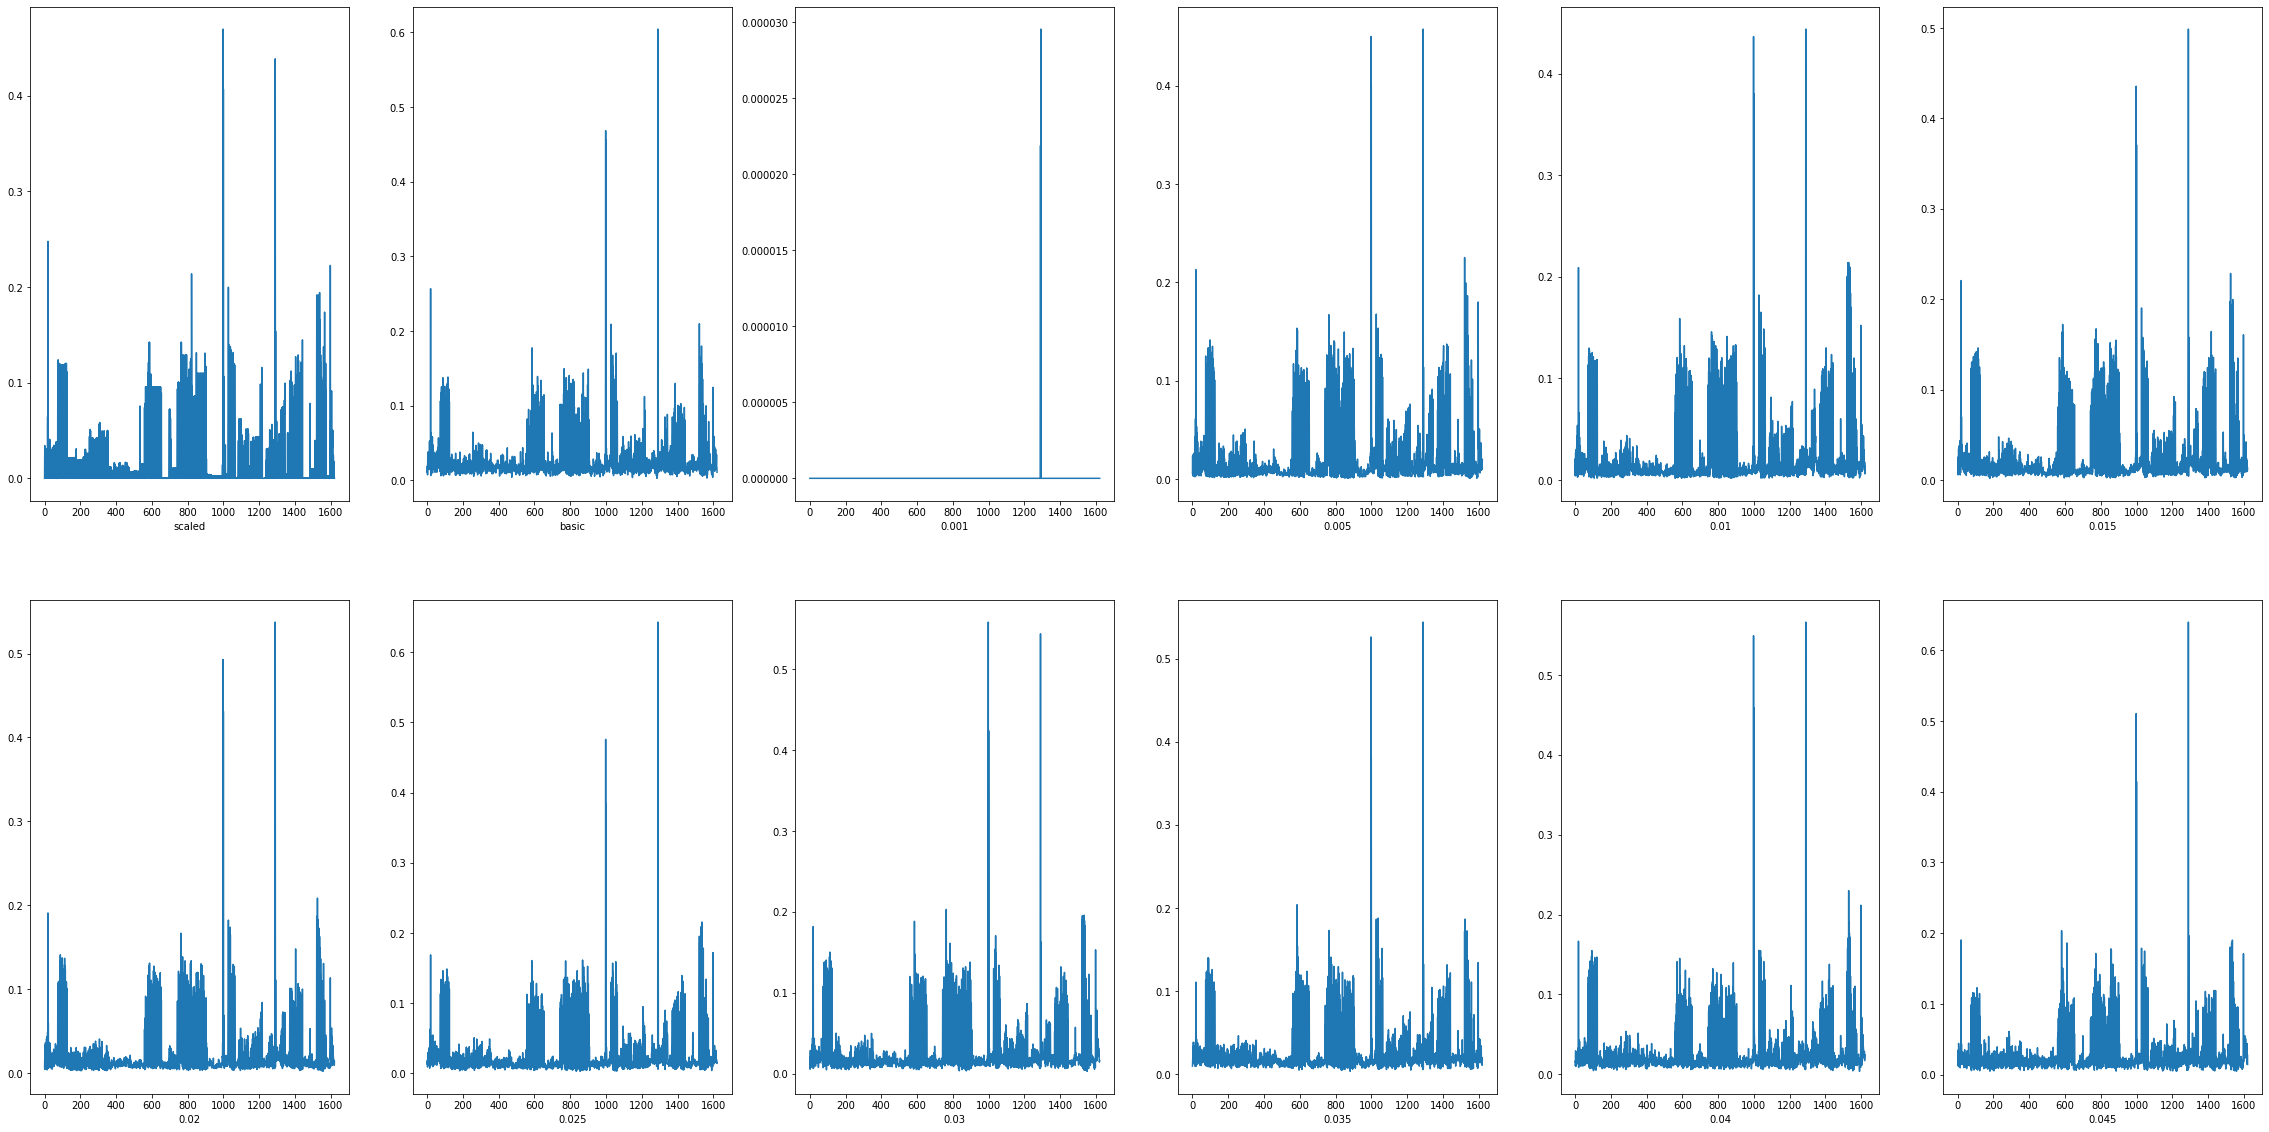

In [78]:
idx = 1234
plotSignals(models_nf, feat_scaled[idx].reshape(1,input_size,),labels)

### 1-layer, change core size

In [33]:
# epochs = 3 # for testing

models_core = [autoencoder_base]
histories_core = [history_base]
core_list = [2**i for i in range(5,12)]

noise_factor = 0.05
feat_noisy = feat_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=feat_scaled.shape) 
feat_noisy = np.clip(feat_noisy, 0., 1.)

for core_size in core_list:

    
    x = Input(shape=(input_size,))
    h = Dense(core_size, activation='relu')(x)
    r = Dense(output_size, activation='sigmoid')(h)

    autoencoder_core = Model(inputs=x, outputs=r)
    autoencoder_core.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

    history = autoencoder_core.fit(feat_noisy, feat_noisy, batch_size=batch_size,epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True, verbose=0)
    models_core.append(autoencoder_core)
    histories_core.append(history)

Save models

In [137]:
file_path = '/Users/bogao/DataFiles/new landscape/models'
model_type = 'dae_coresize_'
for m, n in zip(models_core[1:], core_list):
    filename = ''.join([model_type, str(n)])
    filename = os.path.join(file_path, filename)
    m.save(filename)

In [72]:
labels = [str(i) for i in core_list]
labels.insert(0, 'basic')

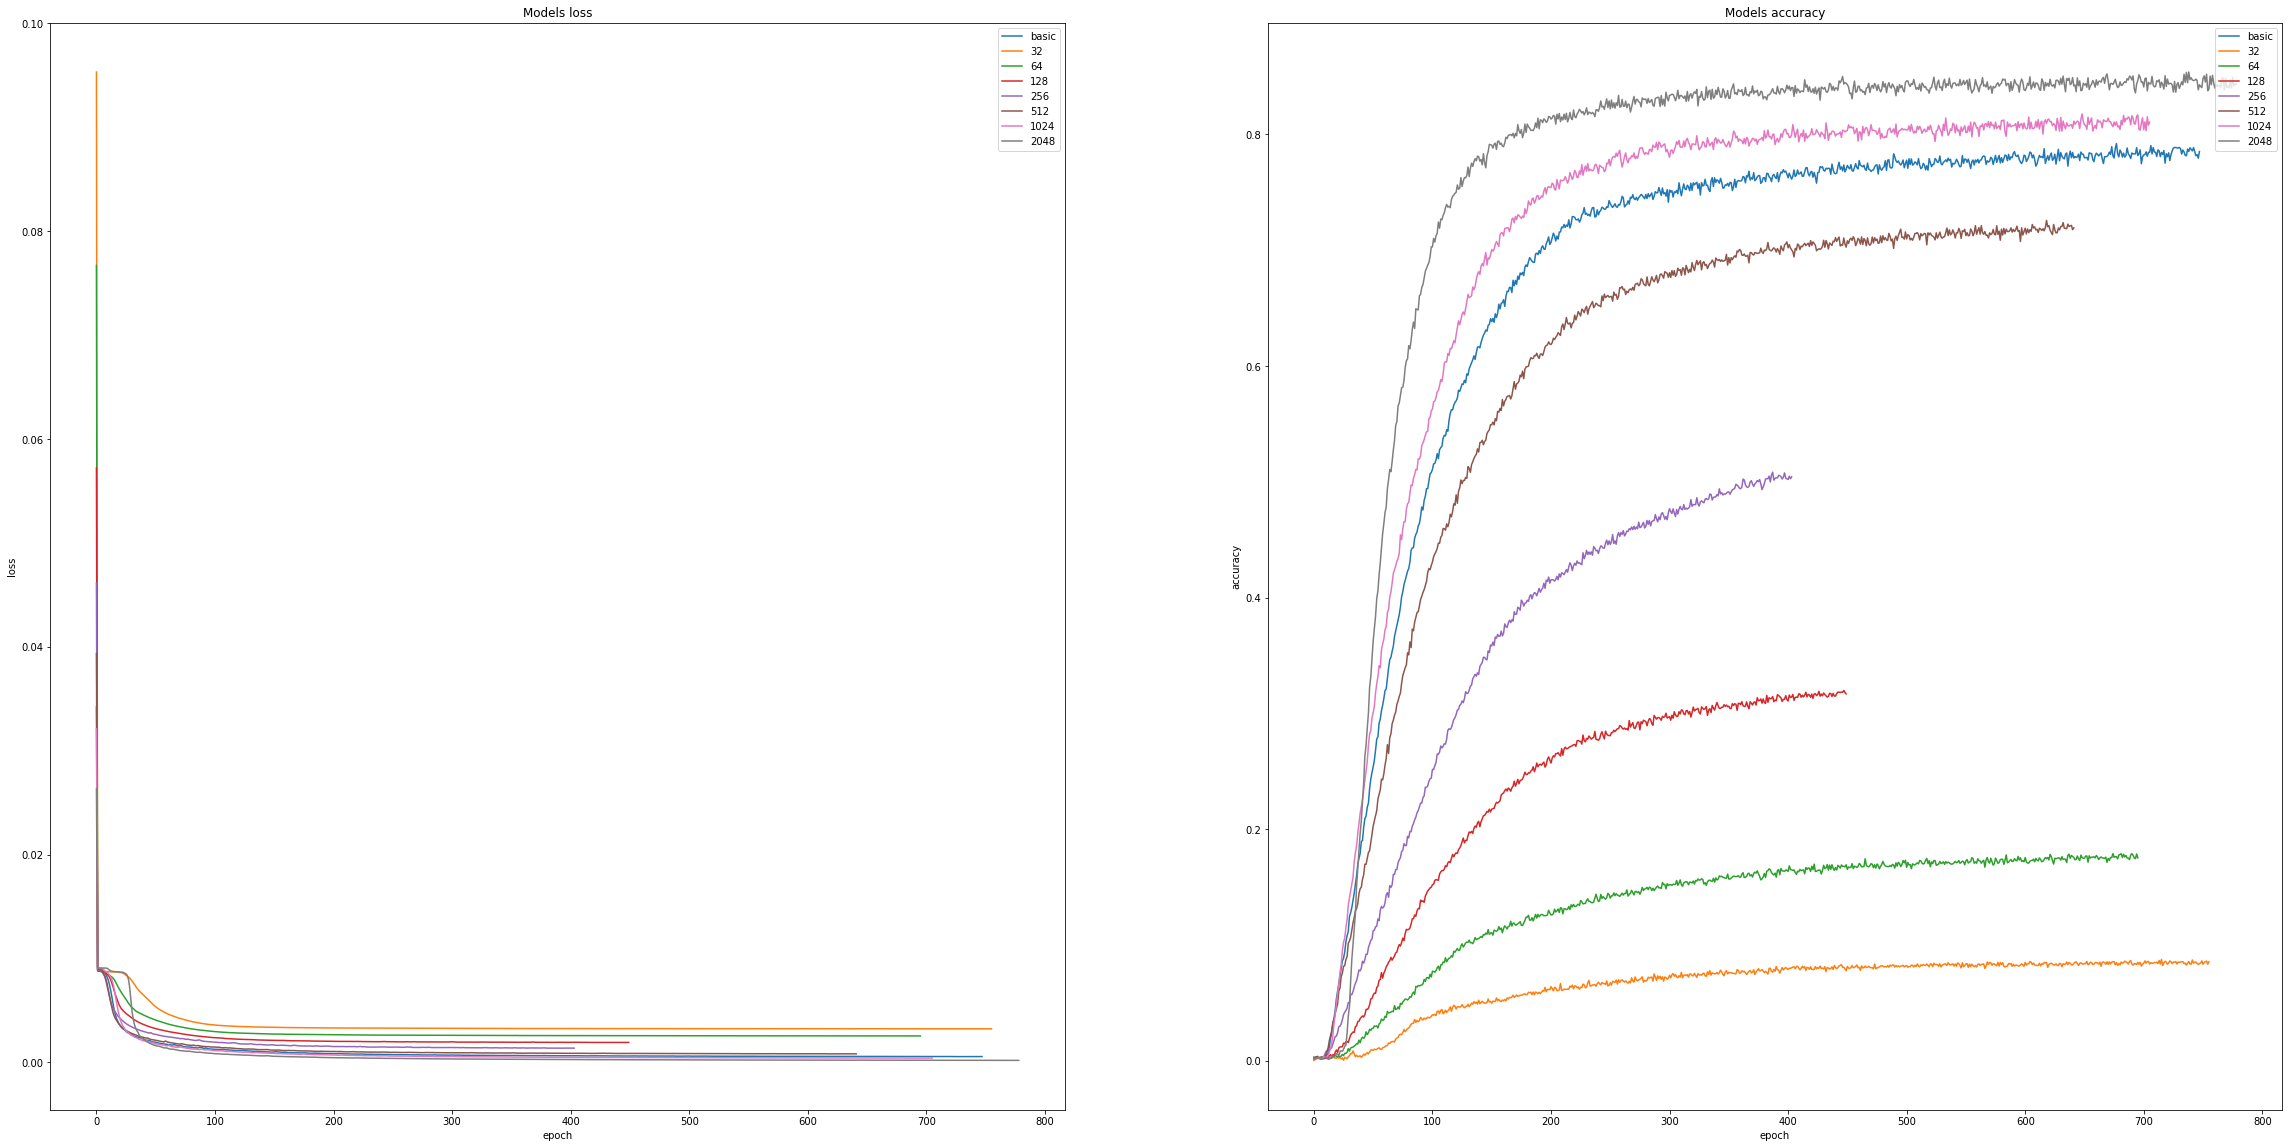

In [34]:
plotHis(histories_core, labels)

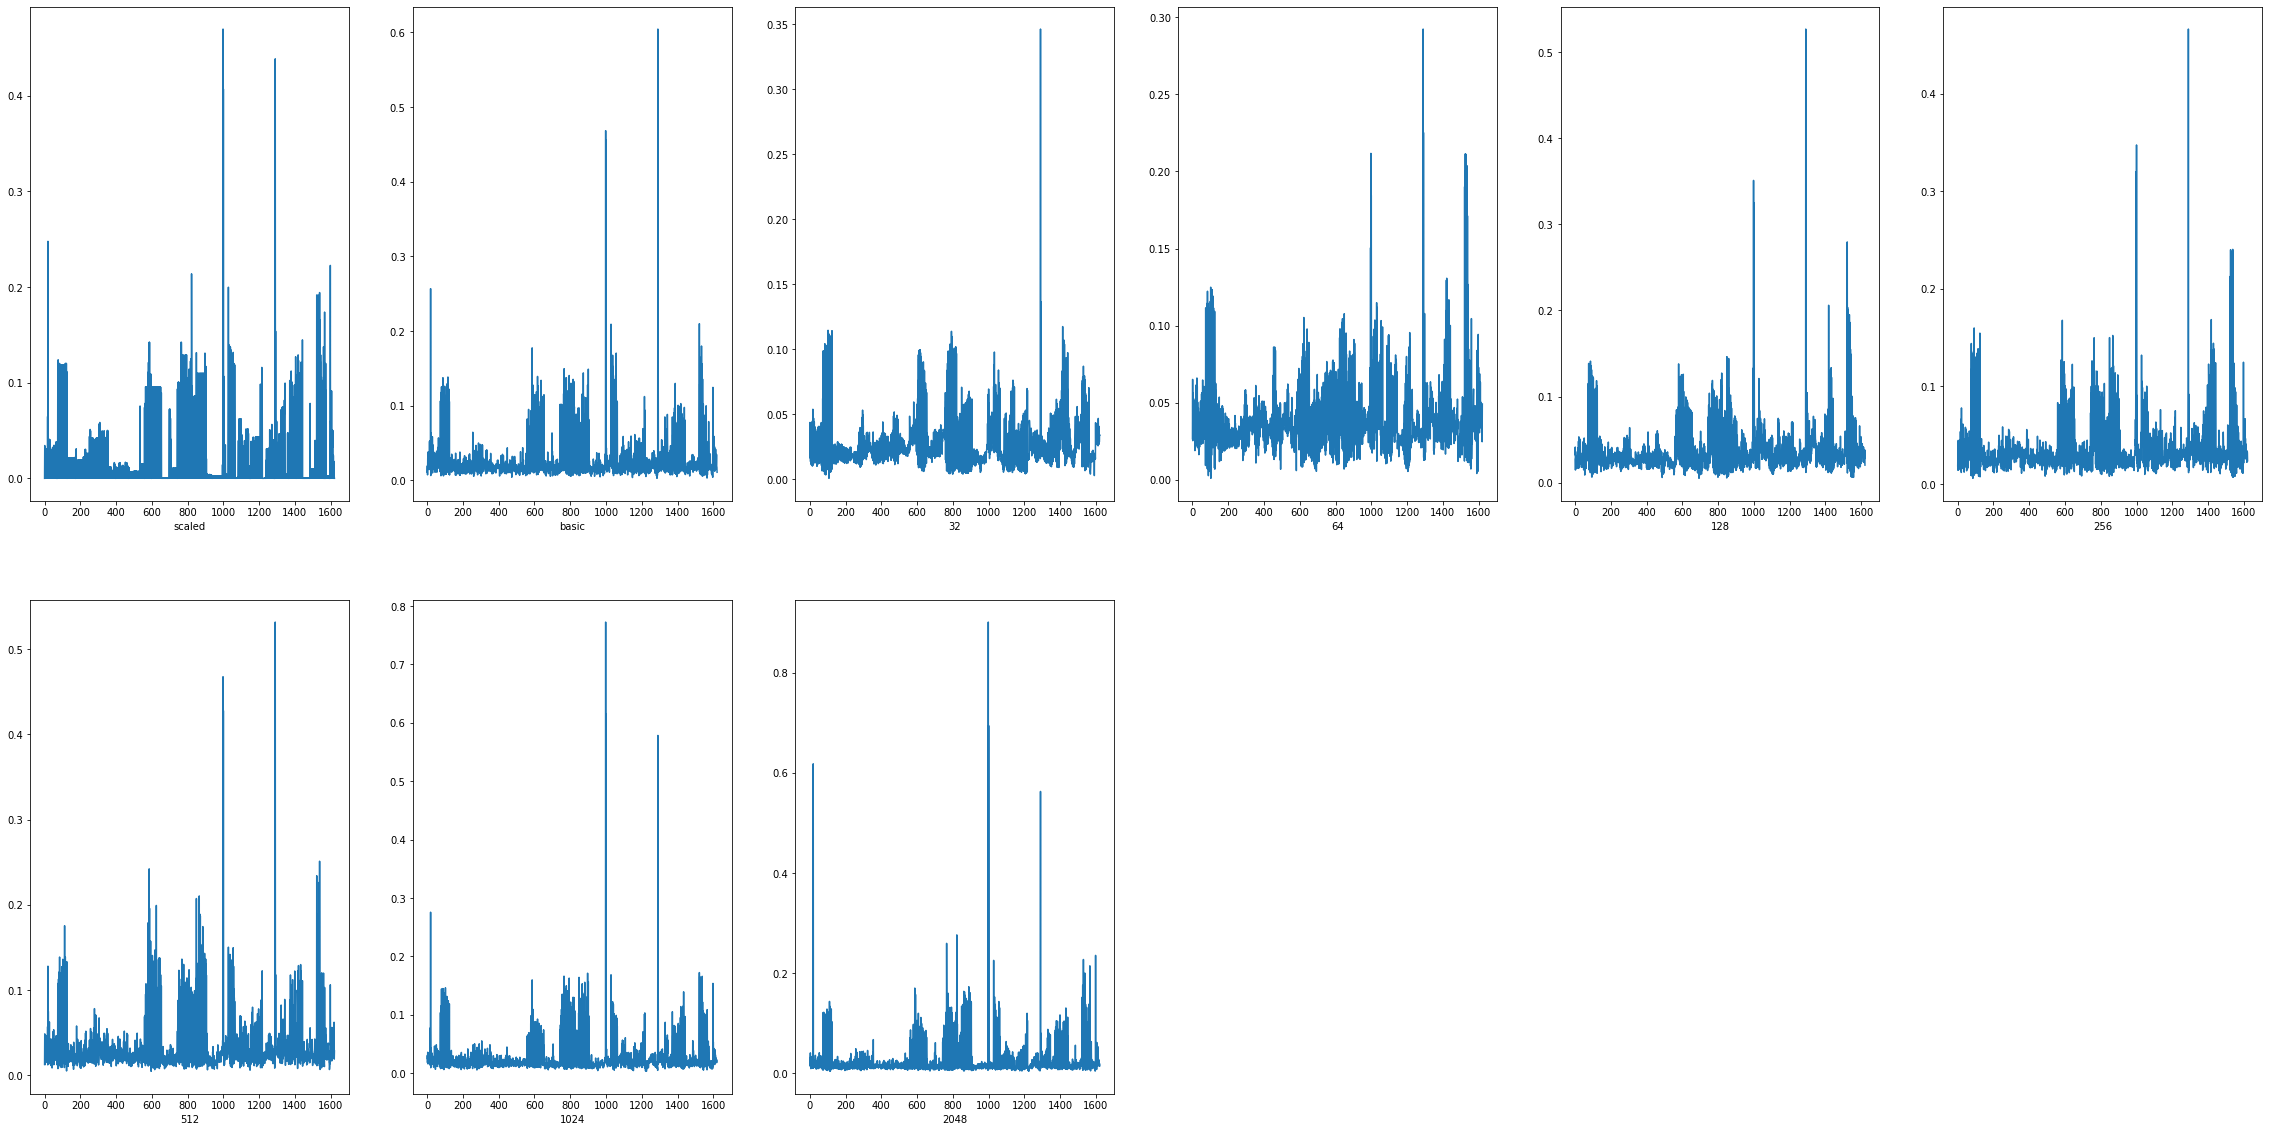

In [76]:
idx = 1234
plotSignals(models_core, feat_scaled[idx].reshape(1,input_size,), labels)

### Increase layers 

In [39]:
noise_factor = 0.05
feat_noisy = feat_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=feat_scaled.shape) 
feat_noisy = np.clip(feat_noisy, 0., 1.)

x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder_dn = Model(inputs=x, outputs=r)
autoencoder_dn.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

history = autoencoder_dn.fit(feat_noisy, feat_noisy, batch_size=batch_size,epochs=epochs, callbacks = [early_stopping_monitor],shuffle=True, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1622)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 800)               1298400   
_________________________________________________________________
dense_4 (Dense)              (None, 1622)              1299222   
Total params: 2,597,622
Trainable params: 2,597,622
Non-trainable params: 0
_________________________________________________________________


In [21]:
core_list

[32, 64, 128, 256, 512, 1024, 2048]

In [ ]:
[str(i) for i in core_list]